In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\Diabetic_Ground_Truth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               905 non-null    int64  
 1   Gender            905 non-null    int64  
 2   Family_Diabetes   905 non-null    int64  
 3   highBP            905 non-null    int64  
 4   PhysicallyActive  905 non-null    int64  
 5   BMI               905 non-null    float64
 6   Smoking           905 non-null    int64  
 7   Alcohol           905 non-null    int64  
 8   Sleep             905 non-null    int64  
 9   SoundSleep        905 non-null    int64  
 10  RegularMedicine   905 non-null    int64  
 11  JunkFood          905 non-null    int64  
 12  Stress            905 non-null    int64  
 13  BPLevel           905 non-null    int64  
 14  Pregnancies       905 non-null    float64
 15  Pdiabetes         905 non-null    int64  
 16  UriationFreq      905 non-null    int64  
 1

Checking Number of unique values

In [6]:
groundTruth.nunique()

Age                  4
Gender               2
Family_Diabetes      2
highBP               2
PhysicallyActive     4
BMI                 26
Smoking              2
Alcohol              2
Sleep                8
SoundSleep          12
RegularMedicine      2
JunkFood             4
Stress               4
BPLevel              3
Pregnancies          5
Pdiabetes            2
UriationFreq         2
Diabetic             2
dtype: int64

In [7]:
print("Age",groundTruth['Age'].unique())
print("Gender",groundTruth['Gender'].unique())
print("Family_Diabetes",groundTruth['Family_Diabetes'].unique())
print("highBP",groundTruth['highBP'].unique())
print("PhysicallyActive",groundTruth['PhysicallyActive'].unique())
print("BMI",groundTruth['BMI'].unique())
print("Smoking",groundTruth['Smoking'].unique())
print("Alcohol",groundTruth['Alcohol'].unique())
print("Sleep",groundTruth['Sleep'].unique())
print("SoundSleep",groundTruth['SoundSleep'].unique())
print("RegularMedicine",groundTruth['RegularMedicine'].unique())
print("JunkFood",groundTruth['JunkFood'].unique())
print("Stress",groundTruth['Stress'].unique())
print("BPLevel",groundTruth['BPLevel'].unique())
print("Pregnancies",groundTruth['Pregnancies'].unique())
print("Pdiabetes",groundTruth['Pdiabetes'].unique())
print("UriationFreq",groundTruth['UriationFreq'].unique())
print("Diabetic",groundTruth['Diabetic'].unique())

Age [1 0 3 2]
Gender [1 0]
Family_Diabetes [0 1]
highBP [1 0]
PhysicallyActive [3 0 2 1]
BMI [39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. 42. 45.]
Smoking [0 1]
Alcohol [0 1]
Sleep [ 8  6 10  7 11  9  4  5]
SoundSleep [ 6  8 10  7 11  4  9  5  3  2  1  0]
RegularMedicine [0 1]
JunkFood [1 3 2 0]
Stress [2 1 3 0]
BPLevel [0 2 1]
Pregnancies [0. 1. 2. 3. 4.]
Pdiabetes [0 1]
UriationFreq [0 1]
Diabetic [0 1]


In [8]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [9]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-2.9665)
maximum: tensor(7.9776)
mean:  tensor(1.8320e-17)
median:  tensor(-0.3642)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [10]:
bucket_specs = {
     
    0: 4,   # Column 0 → age (4 bins)
    1: 2,  # Column 1 → gender (2 bins)
    17: 2,  # Column 17 → label  (2 bins)
    2:2,   # Column 2 → Family Diabetic (2 bins)
    3: 2,   # Column 3 → HighBP (2 bins)
    4: 4, #column 4 ->  PhysicallyActive (4 bins)
    5: 20, #column 5-> BMI (20 bins)
    
    
}

# Define multiple attributes for X, Y, Z
X_cols = [0,1]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [17]     # Bucketized outcome-related attributes
Z_cols = [2,3,4,5]  
#Z_cols = [2, 5, 6, 10, 13, 14]

**CMI for GroundTruth**

In [11]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.2962348251720637


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [12]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
type(miss_mcar25)
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

Total Missing Percentage MAR25: 25.00%
Age                 25.414365
Gender              23.977901
Family_Diabetes     27.513812
highBP              23.977901
PhysicallyActive    24.640884
BMI                 23.314917
Smoking             24.419890
Alcohol             26.629834
Sleep               25.745856
SoundSleep          22.762431
RegularMedicine     22.872928
JunkFood            26.519337
Stress              23.093923
BPLevel             24.088398
Pregnancies         26.187845
Pdiabetes           26.961326
UriationFreq        26.850829
dtype: float64


In [13]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MCAR 25% data

In [14]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.62054752832379


INFO:root:batchsize = 128, epsilon = 0.6205
INFO:root:Iteration 0:	 Loss: 3.4118	 Validation MAE: 0.7896	RMSE: 0.9947
INFO:root:Iteration 50:	 Loss: 3.7258	 Validation MAE: 0.6512	RMSE: 0.9296
INFO:root:Iteration 100:	 Loss: 3.5111	 Validation MAE: 0.6096	RMSE: 0.8987
INFO:root:Iteration 150:	 Loss: 3.1811	 Validation MAE: 0.5849	RMSE: 0.8795
INFO:root:Iteration 200:	 Loss: 3.0170	 Validation MAE: 0.5684	RMSE: 0.8671
INFO:root:Iteration 250:	 Loss: 3.5308	 Validation MAE: 0.5546	RMSE: 0.8550
INFO:root:Iteration 300:	 Loss: 3.2596	 Validation MAE: 0.5473	RMSE: 0.8486
INFO:root:Iteration 350:	 Loss: 3.9780	 Validation MAE: 0.5398	RMSE: 0.8421
INFO:root:Iteration 400:	 Loss: 3.4052	 Validation MAE: 0.5339	RMSE: 0.8366
INFO:root:Iteration 450:	 Loss: 3.1646	 Validation MAE: 0.5285	RMSE: 0.8316
INFO:root:Iteration 500:	 Loss: 4.1792	 Validation MAE: 0.5241	RMSE: 0.8273
INFO:root:Iteration 550:	 Loss: 3.3754	 Validation MAE: 0.5209	RMSE: 0.8224
INFO:root:Iteration 600:	 Loss: 3.3607	 Validat

tensor(0.4950, grad_fn=<DivBackward0>) tensor(0.7949, grad_fn=<SqrtBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [ ]:
#only CMI
on_cmi_missmcar25 = CMI.conditional_mutual_information(on_sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.17634073653293802
tensor(0.6746, grad_fn=<DivBackward0>) tensor(0.9980, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [ ]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(sk_mae_mcar25,sk_rmse_mcar25)





0.7684624164805044


INFO:root:Iteration 0:	 Loss: 11.1159	 Validation MAE: 0.7756	RMSE: 1.0207
INFO:root:Iteration 50:	 Loss: 11.7615	 Validation MAE: 0.7090	RMSE: 1.0064
INFO:root:Iteration 100:	 Loss: 11.7167	 Validation MAE: 0.6929	RMSE: 0.9981
INFO:root:Iteration 150:	 Loss: 11.2780	 Validation MAE: 0.6866	RMSE: 0.9961
INFO:root:Iteration 200:	 Loss: 10.9475	 Validation MAE: 0.6827	RMSE: 0.9939
INFO:root:Iteration 250:	 Loss: 10.6804	 Validation MAE: 0.6810	RMSE: 0.9952
INFO:root:Iteration 300:	 Loss: 11.4607	 Validation MAE: 0.6790	RMSE: 0.9947
INFO:root:Iteration 350:	 Loss: 11.4756	 Validation MAE: 0.6777	RMSE: 0.9948
INFO:root:Iteration 400:	 Loss: 11.2148	 Validation MAE: 0.6776	RMSE: 0.9948
INFO:root:Iteration 450:	 Loss: 12.5584	 Validation MAE: 0.6779	RMSE: 0.9958
INFO:root:Iteration 500:	 Loss: 11.0927	 Validation MAE: 0.6769	RMSE: 0.9958
INFO:root:Iteration 550:	 Loss: 11.2435	 Validation MAE: 0.6753	RMSE: 0.9963
INFO:root:Iteration 600:	 Loss: 11.6802	 Validation MAE: 0.6752	RMSE: 0.9955
IN

CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mcar25 = CMI.conditional_mutual_information(sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar25)
print(sk_mae_mcar25)

0.17697759385615722
tensor(0.6745, grad_fn=<DivBackward0>)


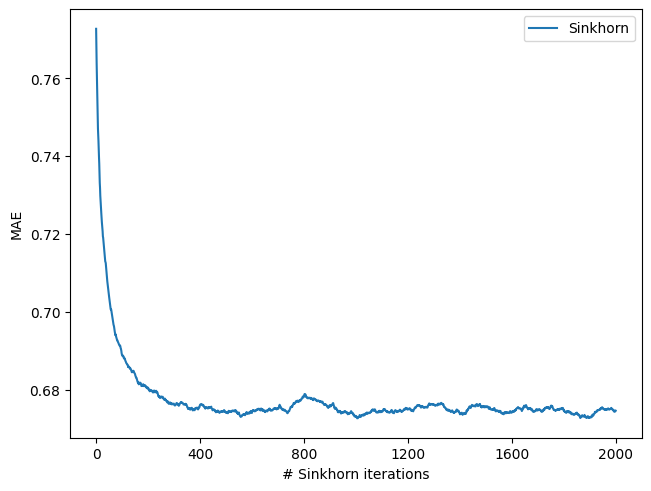

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

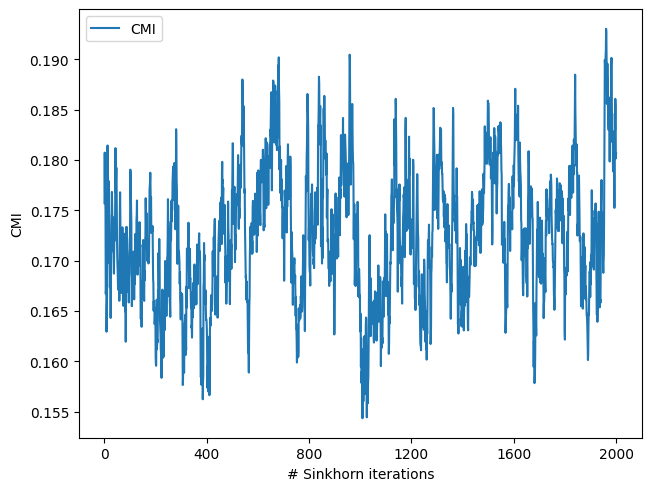

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss_mcar25, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

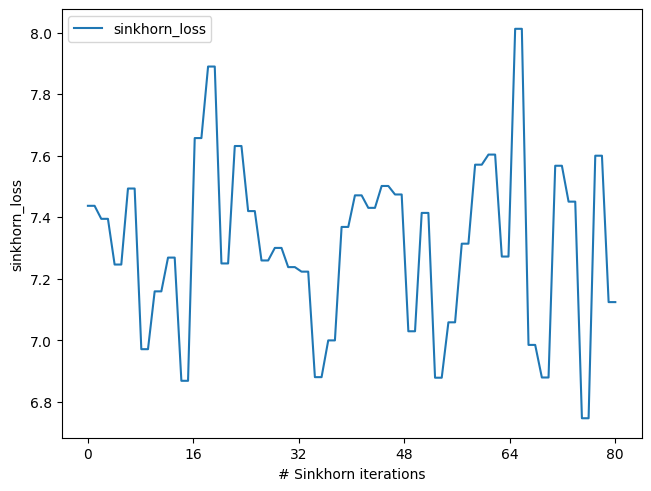

In [ ]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

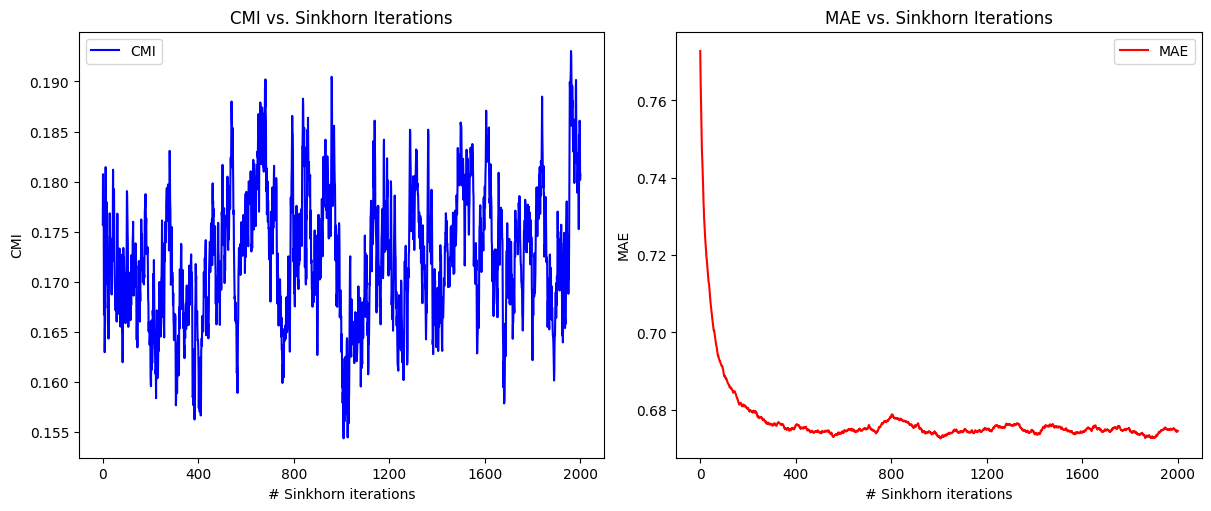

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mcar25)  # Length of CMI data
npoints_mae = len(sk_maes25mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mcar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mcar25 + cmi_loss_mcar25)

# Get the corresponding values
best_cmi = cmi_loss_mcar25[best_tradeoff_idx]
best_mae = sk_maes25mcar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


TypeError: unsupported operand type(s) for +: 'Tensor' and 'list'

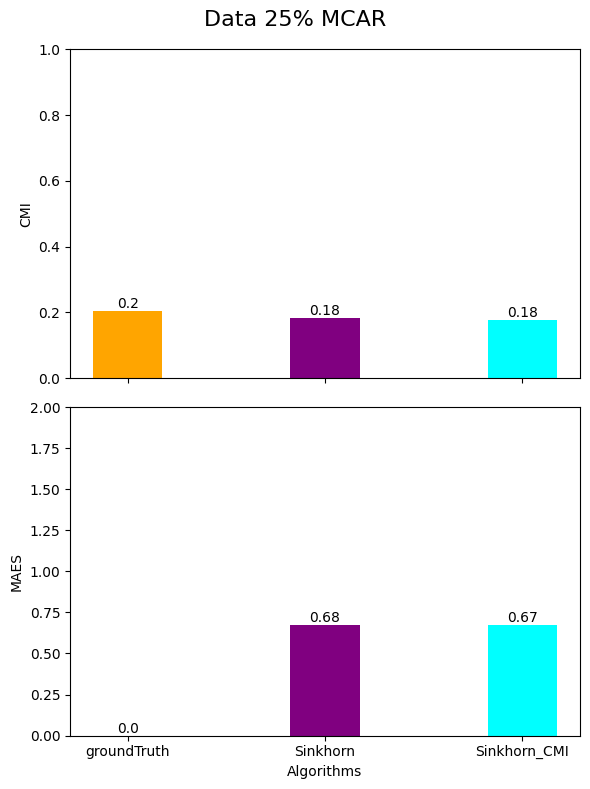

In [ ]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth,on_cmi_missmcar25,cmi_mcar25]
values_maes_mcar25 = [0.0,on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [ ]:
dependencies_mar25 = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.1
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.2 
    },
    
    "job": {
        "influencers": ["employment-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["employment-since"]<2 else 0.2 
    },

    "purpose": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },

    "other-installment": {
        "influencers": ["credit-history"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["credit-history"]<2 else 0.2 
    },

     "housing": {
        "influencers": ["residence-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["residence-since"]<3 else 0.2 
    },
     "other-debtors": {
        "influencers": ["property"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["property"]<2 else 0.2 
    },

     "foreign-worker": {
        "influencers": ["telephone"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["telephone"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"]==1 else 0.2 
    }



}

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [ ]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar25,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.86%


In [ ]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

checking-account                         40.0
duration                                 52.3
credit-history                            0.0
purpose                                  36.9
credit-amount                            37.6
savings-account                          38.0
employment-since                         48.1
installment-rate                          0.0
other-debtors                            47.4
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        57.9
housing                                  43.2
existing-credits                          0.0
job                                      44.9
number-people-provide-maintenance-for    36.5
telephone                                 0.0
foreign-worker                           42.2
sex                                       0.0
marital-status                            0.0
class-label                       

In [ ]:
miss_mar25_numpy = scale(miss_mar25) #z-score scaling
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [ ]:
print(miss_mar25)

     checking-account  duration  credit-history  purpose  credit-amount  \
0                 1.0       NaN               0      7.0         1169.0   
1                 NaN      48.0               1      7.0            NaN   
2                 NaN      12.0               0      NaN            NaN   
3                 NaN      42.0               1      5.0         7882.0   
4                 1.0       NaN               2      NaN         4870.0   
..                ...       ...             ...      ...            ...   
995               3.0       NaN               1      5.0            NaN   
996               1.0       NaN               1      2.0         3857.0   
997               3.0       NaN               1      7.0          804.0   
998               NaN      45.0               1      7.0            NaN   
999               0.0      45.0               0      2.0         4576.0   

     savings-account  employment-since  installment-rate  other-debtors  \
0                NaN    

Applying Sinkhorn algorithm to MAR 25% data

In [ ]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(on_sk_mae_mar25,on_sk_rmse_mar25)

INFO:root:batchsize = 128, epsilon = 0.7914
INFO:root:Iteration 0:	 Loss: 5.4770	 Validation MAE: 0.7227	RMSE: 1.0042


0.7914089195935361


INFO:root:Iteration 50:	 Loss: 5.3047	 Validation MAE: 0.6555	RMSE: 0.9887
INFO:root:Iteration 100:	 Loss: 5.0521	 Validation MAE: 0.6448	RMSE: 0.9830
INFO:root:Iteration 150:	 Loss: 5.3088	 Validation MAE: 0.6413	RMSE: 0.9794
INFO:root:Iteration 200:	 Loss: 5.4243	 Validation MAE: 0.6402	RMSE: 0.9789
INFO:root:Iteration 250:	 Loss: 5.2950	 Validation MAE: 0.6386	RMSE: 0.9765
INFO:root:Iteration 300:	 Loss: 5.6817	 Validation MAE: 0.6381	RMSE: 0.9757
INFO:root:Iteration 350:	 Loss: 5.0795	 Validation MAE: 0.6368	RMSE: 0.9748
INFO:root:Iteration 400:	 Loss: 5.4458	 Validation MAE: 0.6371	RMSE: 0.9750
INFO:root:Iteration 450:	 Loss: 5.2152	 Validation MAE: 0.6371	RMSE: 0.9751
INFO:root:Iteration 500:	 Loss: 4.8894	 Validation MAE: 0.6367	RMSE: 0.9756
INFO:root:Iteration 550:	 Loss: 5.2199	 Validation MAE: 0.6348	RMSE: 0.9750
INFO:root:Iteration 600:	 Loss: 4.9508	 Validation MAE: 0.6352	RMSE: 0.9741
INFO:root:Iteration 650:	 Loss: 5.2203	 Validation MAE: 0.6361	RMSE: 0.9742
INFO:root:Ite

tensor(0.6356, grad_fn=<DivBackward0>) tensor(0.9703, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmar25 = CMI.conditional_mutual_information(on_sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar25)
print(on_sk_mae_mar25)

0.1783481382293862
tensor(0.6356, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [ ]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()


sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(sk_mae_mar25,sk_rmse_mar25)


0.7914089195935361


INFO:root:Iteration 0:	 Loss: 6.9427	 Validation MAE: 0.7223	RMSE: 1.0073
INFO:root:Iteration 50:	 Loss: 7.5063	 Validation MAE: 0.6565	RMSE: 0.9910
INFO:root:Iteration 100:	 Loss: 7.3345	 Validation MAE: 0.6461	RMSE: 0.9844
INFO:root:Iteration 150:	 Loss: 6.8694	 Validation MAE: 0.6433	RMSE: 0.9825
INFO:root:Iteration 200:	 Loss: 7.4275	 Validation MAE: 0.6409	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 6.9849	 Validation MAE: 0.6391	RMSE: 0.9781
INFO:root:Iteration 300:	 Loss: 6.6692	 Validation MAE: 0.6390	RMSE: 0.9776
INFO:root:Iteration 350:	 Loss: 7.0019	 Validation MAE: 0.6372	RMSE: 0.9763
INFO:root:Iteration 400:	 Loss: 7.8483	 Validation MAE: 0.6376	RMSE: 0.9761
INFO:root:Iteration 450:	 Loss: 7.4680	 Validation MAE: 0.6377	RMSE: 0.9764
INFO:root:Iteration 500:	 Loss: 6.9773	 Validation MAE: 0.6375	RMSE: 0.9764
INFO:root:Iteration 550:	 Loss: 7.1068	 Validation MAE: 0.6356	RMSE: 0.9761
INFO:root:Iteration 600:	 Loss: 7.1895	 Validation MAE: 0.6354	RMSE: 0.9747
INFO:root:Itera

tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mar25 = CMI.conditional_mutual_information(sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar25)
print(sk_mae_mar25,sk_rmse_mar25)

0.17955728869178048
tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


C:\Users\zhossai3\AppData\Local\Temp\ipykernel_11344\635805616.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)


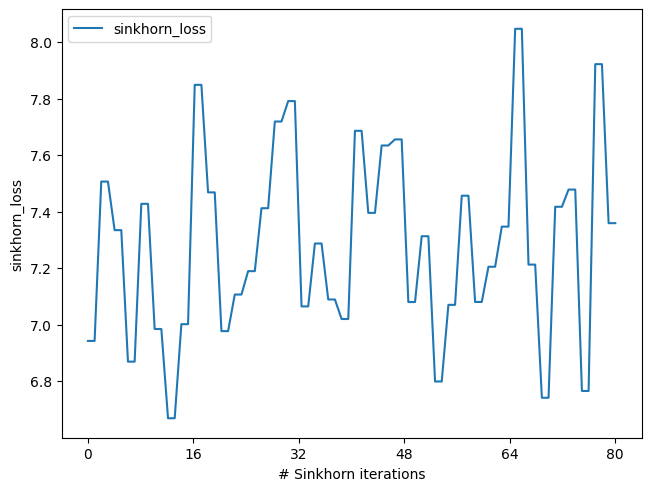

In [ ]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

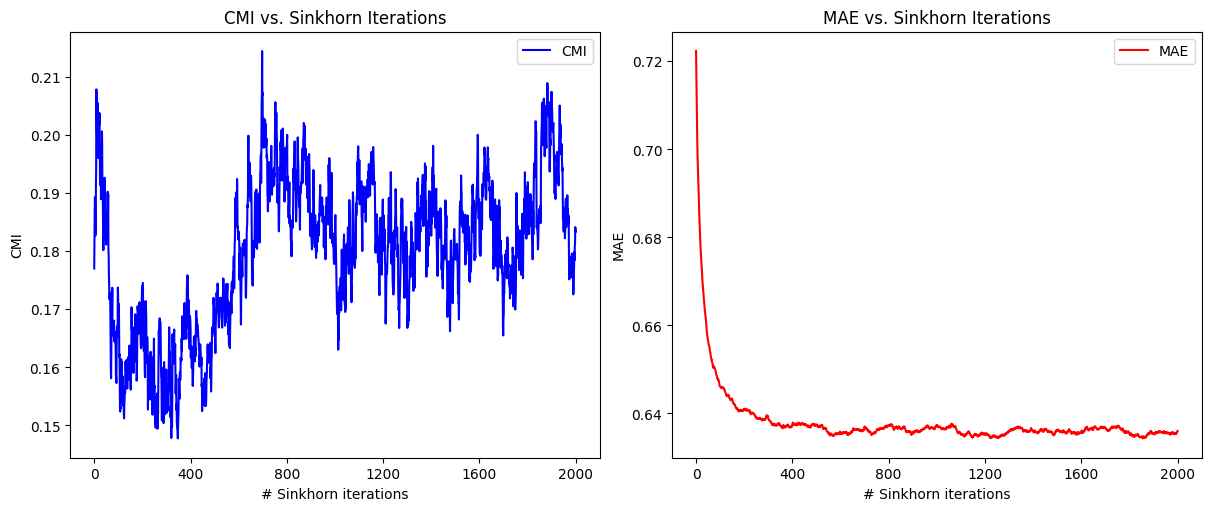

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar25)  # Length of CMI data
npoints_mae = len(sk_maes25mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


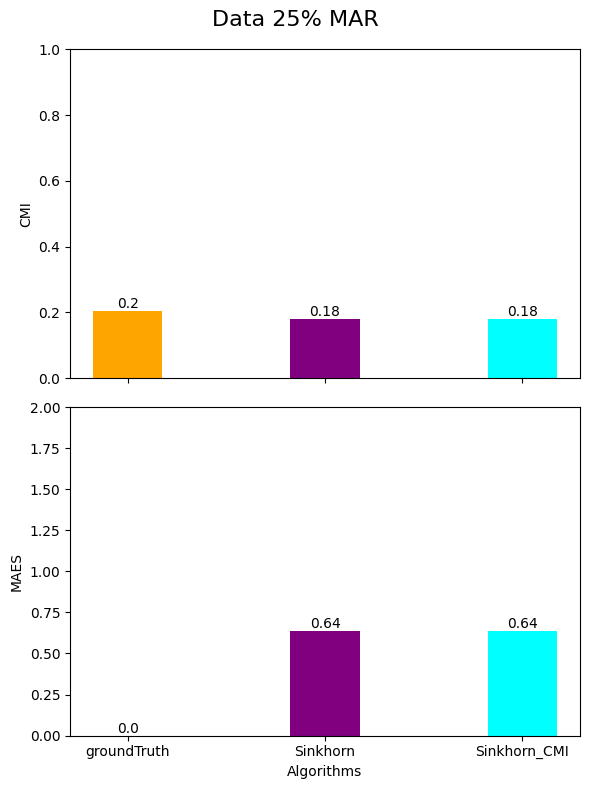

In [ ]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth,on_cmi_missmar25,cmi_mar25]
values_maes_mar25 = [0.0,on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mar25 + cmi_loss_mar25)

# Get the corresponding values
best_cmi = cmi_loss_mar25[best_tradeoff_idx]
best_mae = sk_maes25mar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


**25% MNAR**

In [ ]:
dependencies_mnar25 = {
    "checking-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["checking-account"] < 2 else 0.05
    },
    "duration": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["duration"] <= 20 else 0.05
    },
    "savings-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != 0 else 0.1
    },
    "employment-since": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] in [1,2] else 0.1
    },
    "credit-amount": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > 5000 else 0.05
    },
    "job": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["job"] < 2 else 0.05
    },

    "other-installment": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-installment"]==0 else 0.2 
    },

    "housing": {
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["housing"]==2 else 0.2 
    },

    "other-debtors": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-debtors"]==0 else 0.2 
    },

     "foreign-worker": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["foreign-worker"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["number-people-provide-maintenance-for"]==1 else 0.2 
    }



}


Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [ ]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar25,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [ ]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         47.7
duration                                 49.6
credit-history                            0.0
purpose                                   0.0
credit-amount                            21.2
savings-account                          41.2
employment-since                         32.2
installment-rate                          0.0
other-debtors                            45.7
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        48.5
housing                                  48.0
existing-credits                          0.0
job                                      44.6
number-people-provide-maintenance-for    71.5
telephone                                 0.0
foreign-worker                           74.8
sex                                       0.0
marital-status                            0.0
class-label                       

In [ ]:
miss_mnar25_numpy = scale(miss_mnar25) #z-score scaling
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [ ]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(on_sk_mae_mnar25, on_sk_rmse_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7923
INFO:root:Iteration 0:	 Loss: 5.7076	 Validation MAE: 0.6668	RMSE: 0.9645


0.7923292030320952


INFO:root:Iteration 50:	 Loss: 5.3259	 Validation MAE: 0.6110	RMSE: 0.9483
INFO:root:Iteration 100:	 Loss: 5.3726	 Validation MAE: 0.6012	RMSE: 0.9435
INFO:root:Iteration 150:	 Loss: 5.6820	 Validation MAE: 0.5957	RMSE: 0.9397
INFO:root:Iteration 200:	 Loss: 5.7264	 Validation MAE: 0.5928	RMSE: 0.9363
INFO:root:Iteration 250:	 Loss: 6.0913	 Validation MAE: 0.5905	RMSE: 0.9339
INFO:root:Iteration 300:	 Loss: 5.2406	 Validation MAE: 0.5912	RMSE: 0.9335
INFO:root:Iteration 350:	 Loss: 5.5132	 Validation MAE: 0.5917	RMSE: 0.9332
INFO:root:Iteration 400:	 Loss: 6.2569	 Validation MAE: 0.5900	RMSE: 0.9316
INFO:root:Iteration 450:	 Loss: 5.6684	 Validation MAE: 0.5905	RMSE: 0.9326
INFO:root:Iteration 500:	 Loss: 5.5527	 Validation MAE: 0.5881	RMSE: 0.9304
INFO:root:Iteration 550:	 Loss: 5.7824	 Validation MAE: 0.5873	RMSE: 0.9297
INFO:root:Iteration 600:	 Loss: 5.2420	 Validation MAE: 0.5879	RMSE: 0.9307
INFO:root:Iteration 650:	 Loss: 5.5181	 Validation MAE: 0.5874	RMSE: 0.9306
INFO:root:Ite

tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmnar25 = CMI.conditional_mutual_information(on_sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar25)
print(on_sk_mae_mnar25,on_sk_rmse_mnar25)

0.20288026192869105
tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [ ]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(sk_mae_mnar25, sk_rmse_mnar25)





0.7923292030320952


INFO:root:Iteration 0:	 Loss: 7.5839	 Validation MAE: 0.6684	RMSE: 0.9684
INFO:root:Iteration 50:	 Loss: 8.0436	 Validation MAE: 0.6118	RMSE: 0.9492
INFO:root:Iteration 100:	 Loss: 7.5607	 Validation MAE: 0.6010	RMSE: 0.9431
INFO:root:Iteration 150:	 Loss: 7.7766	 Validation MAE: 0.5981	RMSE: 0.9407
INFO:root:Iteration 200:	 Loss: 7.8110	 Validation MAE: 0.5941	RMSE: 0.9370
INFO:root:Iteration 250:	 Loss: 7.6452	 Validation MAE: 0.5923	RMSE: 0.9357
INFO:root:Iteration 300:	 Loss: 7.3966	 Validation MAE: 0.5913	RMSE: 0.9347
INFO:root:Iteration 350:	 Loss: 7.8436	 Validation MAE: 0.5910	RMSE: 0.9341
INFO:root:Iteration 400:	 Loss: 7.9201	 Validation MAE: 0.5898	RMSE: 0.9334
INFO:root:Iteration 450:	 Loss: 8.4329	 Validation MAE: 0.5903	RMSE: 0.9337
INFO:root:Iteration 500:	 Loss: 7.6480	 Validation MAE: 0.5886	RMSE: 0.9324
INFO:root:Iteration 550:	 Loss: 7.6659	 Validation MAE: 0.5884	RMSE: 0.9313
INFO:root:Iteration 600:	 Loss: 7.8441	 Validation MAE: 0.5872	RMSE: 0.9308
INFO:root:Itera

tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mnar25 = CMI.conditional_mutual_information(sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar25)
print(sk_mae_mnar25,sk_rmse_mnar25)

0.21279227874799675
tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


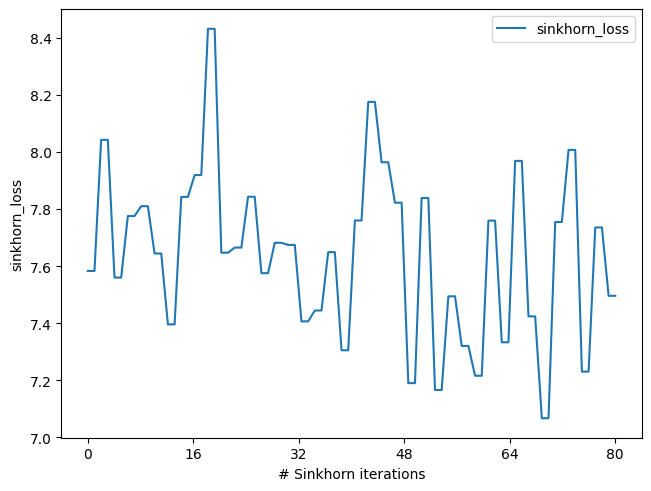

In [ ]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

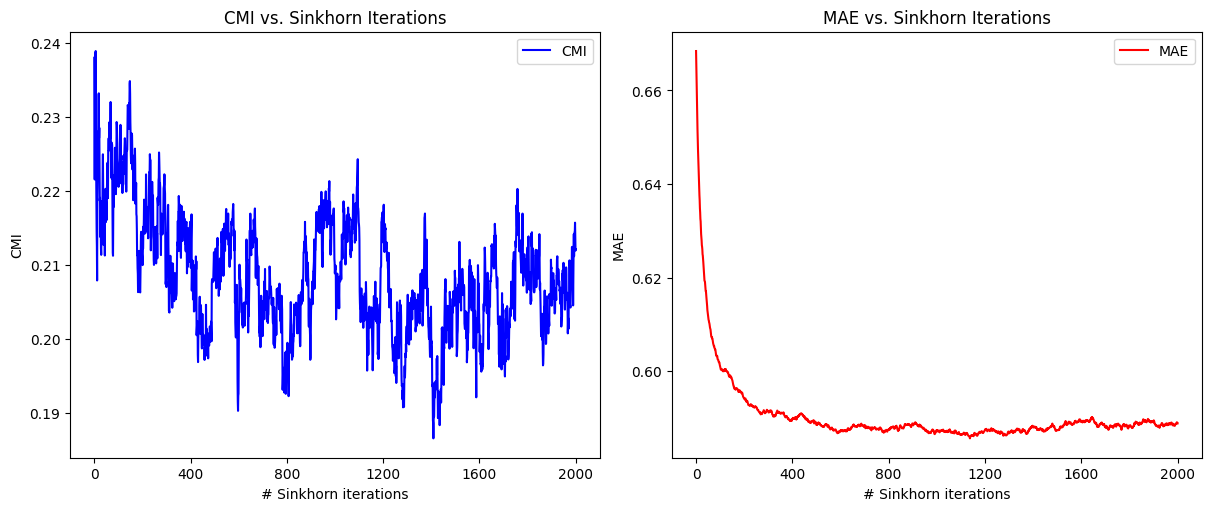

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar25)  # Length of CMI data
npoints_mae = len(sk_maes25mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


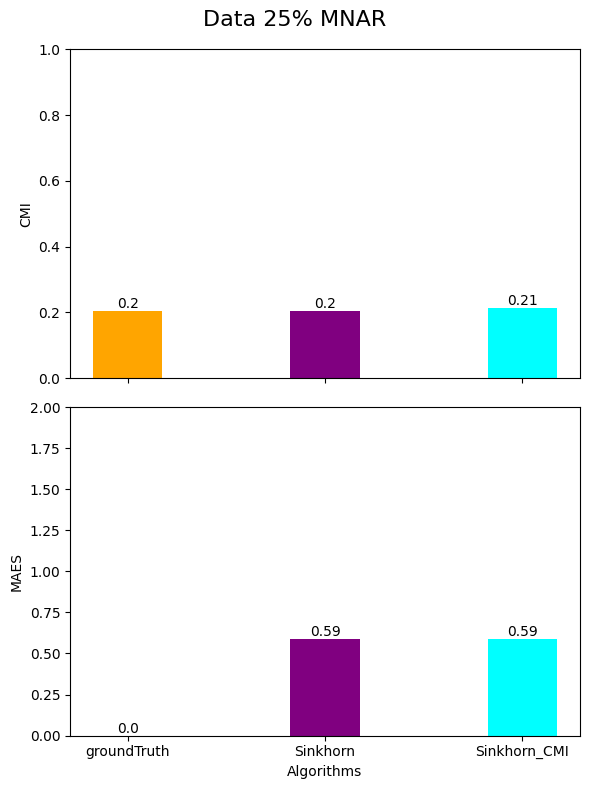

In [ ]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth,on_cmi_missmnar25,cmi_mnar25]
values_maes_mnar25 = [0.0,on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


In [ ]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sinkhorn_loss_mnar25 + cmi_loss_mnar25)

# Get the corresponding values
best_cmi = cmi_loss_mnar25[best_tradeoff_idx]
best_mae = sk_maes25mnar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae
